In [2]:
#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, LSTM
import warnings
warnings.filterwarnings('ignore')

In [71]:
#Read the dataset
loan_df_train = pd.read_csv('credit_train.csv')
loan_df_train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [72]:
#Checking the columns
loan_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [73]:
#Checking the null values
loan_df_train.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

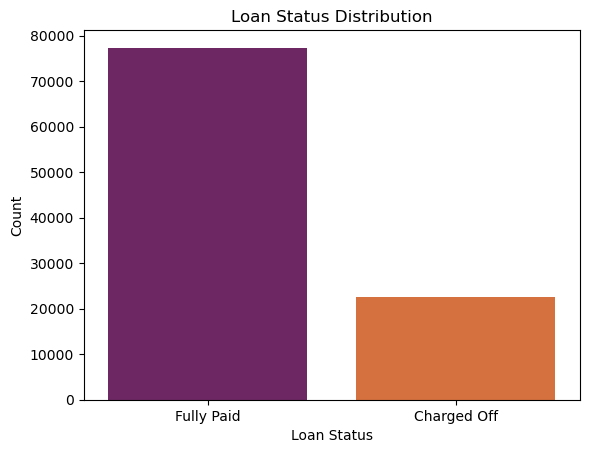

In [74]:
#Countplot for Loan Status
sns.countplot(x='Loan Status', data=loan_df_train,palette='inferno')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

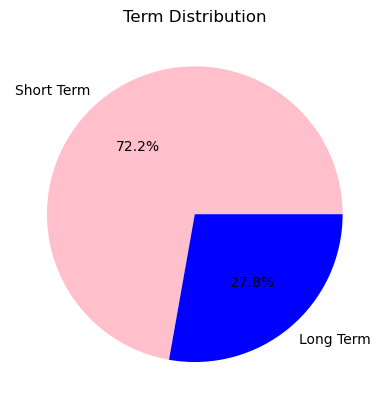

In [75]:
#Pie chart for Term
loan_df_train['Term'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['pink','b'])
plt.title('Term Distribution')
plt.ylabel('')
plt.show()

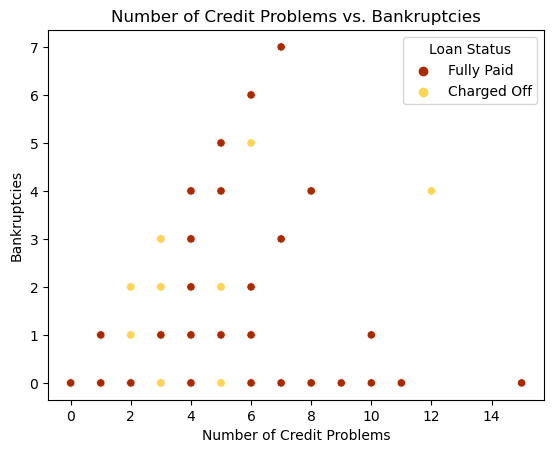

In [95]:
#Scatterplot for number of credit problems vs Bankruptcies
sns.scatterplot(x='Number of Credit Problems', y='Bankruptcies',hue='Loan Status',data=loan_df_train, palette='afmhot')
plt.title('Number of Credit Problems vs. Bankruptcies')
plt.show()

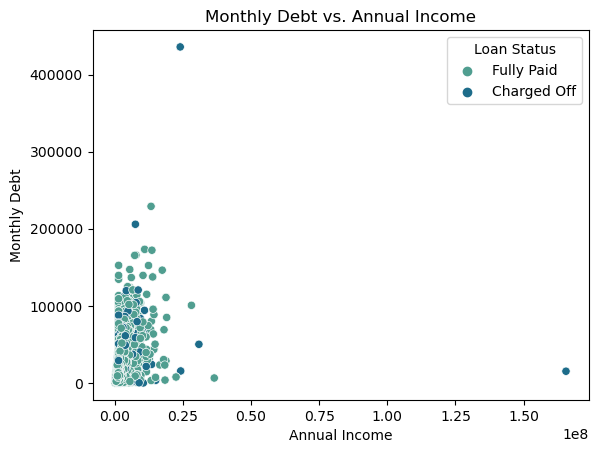

In [96]:
#Scatterplot for Annual Income and Monthly Debt with Loan Status
sns.scatterplot(x='Annual Income', y='Monthly Debt',hue='Loan Status',palette='crest', data=loan_df_train)
plt.title('Monthly Debt vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Monthly Debt')
plt.show()



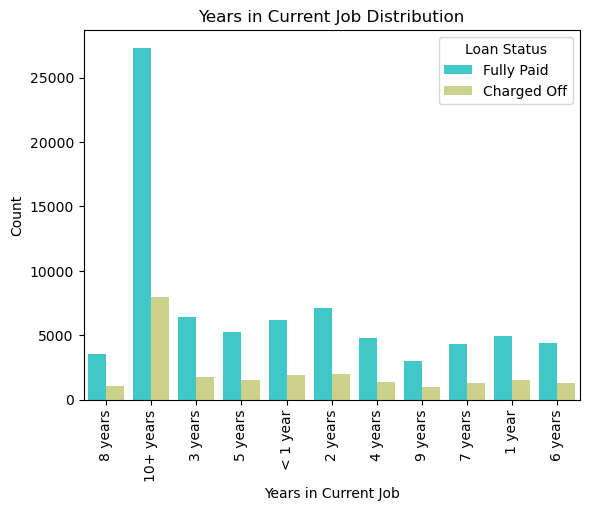

In [61]:
#count plot for Years in current job with Loan Status
sns.countplot(x='Years in current job',hue='Loan Status', data=loan_df_train, palette='rainbow')
plt.title('Years in Current Job Distribution')
plt.xlabel('Years in Current Job')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

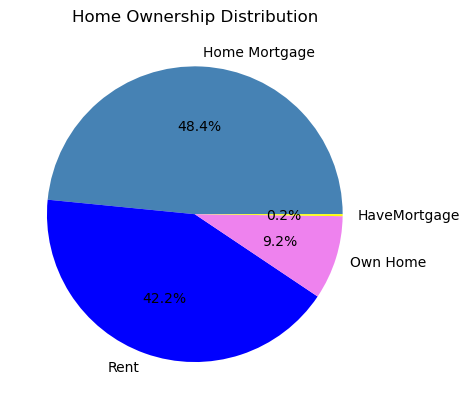

In [51]:
#Pie chart for Home Ownership
loan_df_train['Home Ownership'].value_counts().plot(kind='pie', autopct='%1.1f%%',colors=['steelblue','b','violet','yellow'])
plt.title('Home Ownership Distribution')
plt.ylabel('')
plt.show()

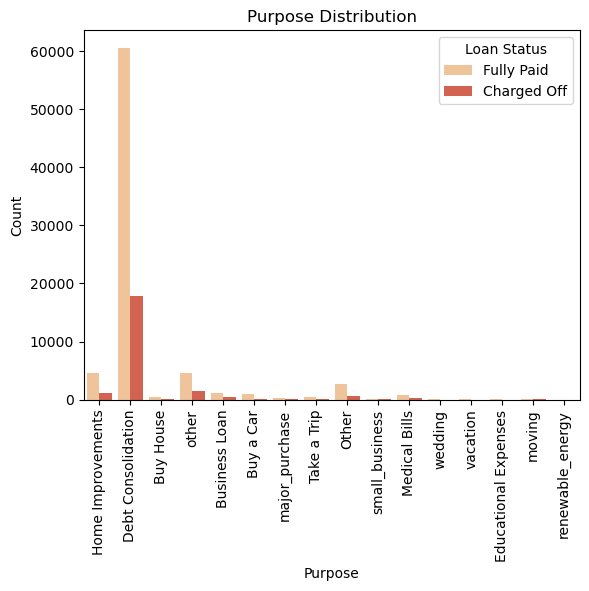

In [59]:
#Countplot for Purpose with Loan Status
sns.countplot(x='Purpose',hue='Loan Status', data=loan_df_train, palette='OrRd')
plt.title('Purpose Distribution')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [97]:
#First 5 rows 
loan_df_train.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.000000,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,1076.275101,1.378339e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.000000,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.000000,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,1076.275101,1.378339e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


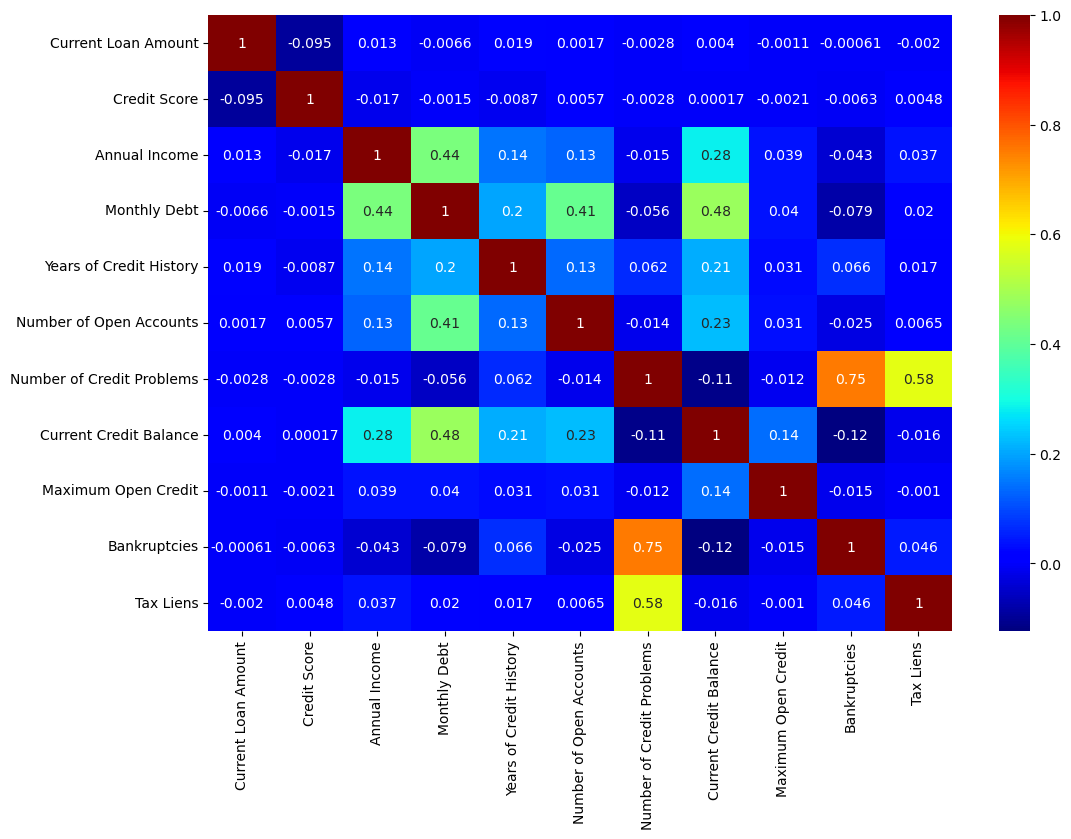

In [103]:
#Correlation Heatmap
numeric_columns = loan_df_train.select_dtypes(include=[np.number]).columns
correlation_matrix = loan_df_train[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='jet')
plt.show()

In [6]:
#missing percentage of dataset
missing_percentage = (loan_df_train.isnull().sum() / len(loan_df_train)) * 100
print(missing_percentage)


Loan ID                          0.511372
Customer ID                      0.511372
Loan Status                      0.511372
Current Loan Amount              0.511372
Term                             0.511372
Credit Score                    19.567423
Annual Income                   19.567423
Years in current job             4.711781
Home Ownership                   0.511372
Purpose                          0.511372
Monthly Debt                     0.511372
Years of Credit History          0.511372
Months since last delinquent    53.380624
Number of Open Accounts          0.511372
Number of Credit Problems        0.511372
Current Credit Balance           0.511372
Maximum Open Credit              0.513361
Bankruptcies                     0.714328
Tax Liens                        0.521320
dtype: float64


In [7]:
#drop the column with more than 50 percent missing value
loan_df_train = loan_df_train.drop('Months since last delinquent', axis=1)


In [8]:
#Drop the ID columns
loan_df_train = loan_df_train.drop(['Loan ID', 'Customer ID'], axis=1)


In [9]:
#last 514 rows
loan_df_train[loan_df_train['Years of Credit History'].isnull()==True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#drop the last 514 rows
loan_df_train.drop(loan_df_train.tail(514).index, inplace=True) 

In [11]:
#Checking the missing percentage
missing_percentage = (loan_df_train.isnull().sum() / len(loan_df_train)) * 100
print(missing_percentage)

Loan Status                   0.000
Current Loan Amount           0.000
Term                          0.000
Credit Score                 19.154
Annual Income                19.154
Years in current job          4.222
Home Ownership                0.000
Purpose                       0.000
Monthly Debt                  0.000
Years of Credit History       0.000
Number of Open Accounts       0.000
Number of Credit Problems     0.000
Current Credit Balance        0.000
Maximum Open Credit           0.002
Bankruptcies                  0.204
Tax Liens                     0.010
dtype: float64


In [12]:
#Dataset Shape
loan_df_train.shape

(100000, 16)

In [15]:
#Label Encoder
label_encoder = LabelEncoder()
loan_df_train['Loan Status'] = label_encoder.fit_transform(loan_df_train['Loan Status'])
loan_df_train['Term'] = label_encoder.fit_transform(loan_df_train['Term'])
loan_df_train['Years in current job'] = label_encoder.fit_transform(loan_df_train['Years in current job'])
loan_df_train['Home Ownership'] = label_encoder.fit_transform(loan_df_train['Home Ownership'])
loan_df_train['Purpose'] = label_encoder.fit_transform(loan_df_train['Purpose'])


In [16]:
#Fill null values with median,mode
loan_df_train['Credit Score'].fillna(loan_df_train['Credit Score'].median(),inplace= True)
loan_df_train['Annual Income'].fillna(loan_df_train['Annual Income'].median(),inplace= True)
loan_df_train['Years in current job']=loan_df_train['Years in current job'].fillna(loan_df_train['Years in current job'].mode()[0])
loan_df_train['Bankruptcies'].fillna(loan_df_train['Bankruptcies'].median(),inplace= True)
loan_df_train['Tax Liens'].fillna(loan_df_train['Tax Liens'].median(),inplace= True)
loan_df_train['Maximum Open Credit'].fillna(loan_df_train['Maximum Open Credit'].median(),inplace= True)

In [17]:
#checking the null values
loan_df_train.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

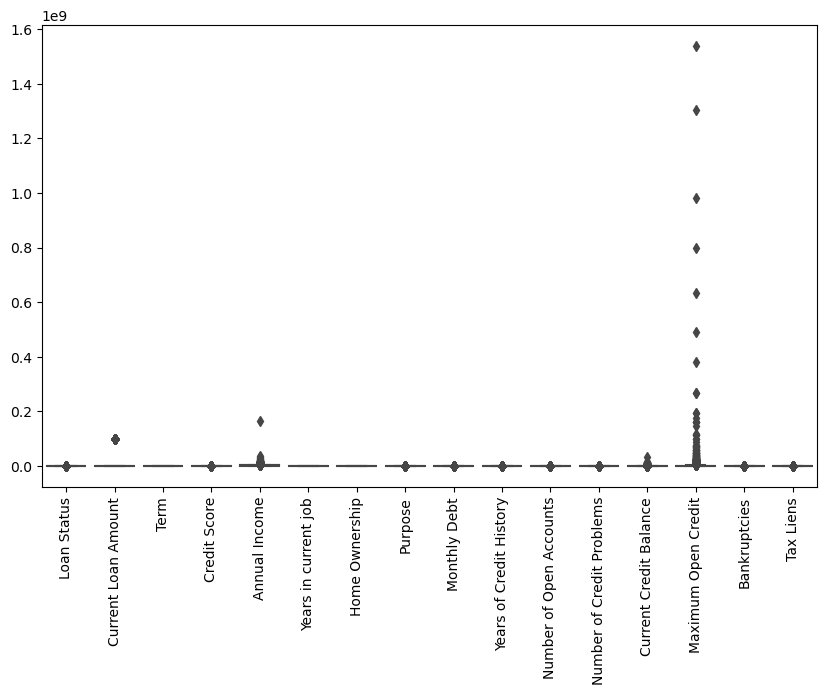

In [18]:
# Convert DataFrame to NumPy array
data_array = loan_df_train.to_numpy()

# Get column names
column_names = loan_df_train.columns

# Plot boxplot using the NumPy array and column names
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_array)
plt.xticks(ticks=range(len(column_names)), labels=column_names, rotation=90)
plt.show()

In [19]:
# IQR
Q1 = np.percentile(loan_df_train['Annual Income'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(loan_df_train['Annual Income'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", loan_df_train.shape)
 
# Upper bound
upper = np.where(loan_df_train['Annual Income'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(loan_df_train['Annual Income'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
loan_df_train.drop(upper[0], inplace = True)
loan_df_train.drop(lower[0], inplace = True)
print("New Shape: ", loan_df_train.shape)

Old Shape:  (100000, 16)
New Shape:  (93087, 16)


In [20]:
# Remove rows where the 'Maximum Open Credit' is greater than $71 million (7.1**8)
loan_df_train = loan_df_train.drop(loan_df_train[loan_df_train['Maximum Open Credit']>7.1**8].index)

In [68]:
#Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_Loan = loan_df_train
VIF=pd.Series([variance_inflation_factor(vif_Loan.values,i) 
for i in range(vif_Loan.shape[1])],index=vif_Loan.columns)
VIF

Current Loan Amount           1.180856
Term                          3.675121
Credit Score                  1.739506
Annual Income                10.181086
Years in current job          2.321346
Home Ownership                4.455917
Purpose                       3.539987
Monthly Debt                  6.957563
Years of Credit History       7.385807
Number of Open Accounts       7.435102
Number of Credit Problems     8.069631
Current Credit Balance        6.194095
Maximum Open Credit           6.130317
Bankruptcies                  5.512520
Tax Liens                     2.984734
Loan Status                   4.802465
dtype: float64

In [66]:
# multicollinearity Treatment
def MC_remover(loan_df_train):
    vif=pd.Series([variance_inflation_factor(loan_df_train.values,i)for i in range(loan_df_train.shape[1])],index=loan_df_train.columns)
    if vif.max()>5:
        print(vif[vif == vif.max()].index[0],'has been eliminated')
        loan_df_train = loan_df_train.drop(columns=[vif[vif==vif.max()].index[0]])
        return loan_df_train
    else:
        print("Multicollinearity not present")
        return loan_df_train

In [69]:
#Vif
for i in range(10):
    vif_Loan=MC_remover(vif_Loan)
vif_Loan.head()

Annual Income has been eliminated
Number of Credit Problems has been eliminated
Number of Open Accounts has been eliminated
Years of Credit History has been eliminated
Current Credit Balance has been eliminated
Multicollinearity not present
Multicollinearity not present
Multicollinearity not present
Multicollinearity not present
Multicollinearity not present


,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
0,445412.0,1,709.0,8,1,5,5214.74,416746.0,1.0,0.0,1
1,262328.0,1,724.0,1,1,3,33295.98,850784.0,0.0,0.0,1
2,99999999.0,1,741.0,8,2,3,29200.53,750090.0,0.0,0.0,1
3,347666.0,0,721.0,3,2,3,8741.90,386958.0,0.0,0.0,1
4,176220.0,1,724.0,5,3,3,20639.70,427174.0,0.0,0.0,1


In [70]:
#making VIF calculations for the remaining columns
VIF=pd.Series([variance_inflation_factor(vif_Loan.values,i) for i in range(vif_Loan.shape[1])],index=vif_Loan.columns)
VIF,len(vif_Loan.columns)

(Current Loan Amount     1.180277
 Term                    3.562582
 Credit Score            1.656837
 Years in current job    2.279806
 Home Ownership          4.251398
 Purpose                 3.343688
 Monthly Debt            3.716726
 Maximum Open Credit     2.599917
 Bankruptcies            1.125139
 Tax Liens               1.014959
 Loan Status             4.236018
 dtype: float64,
 11)

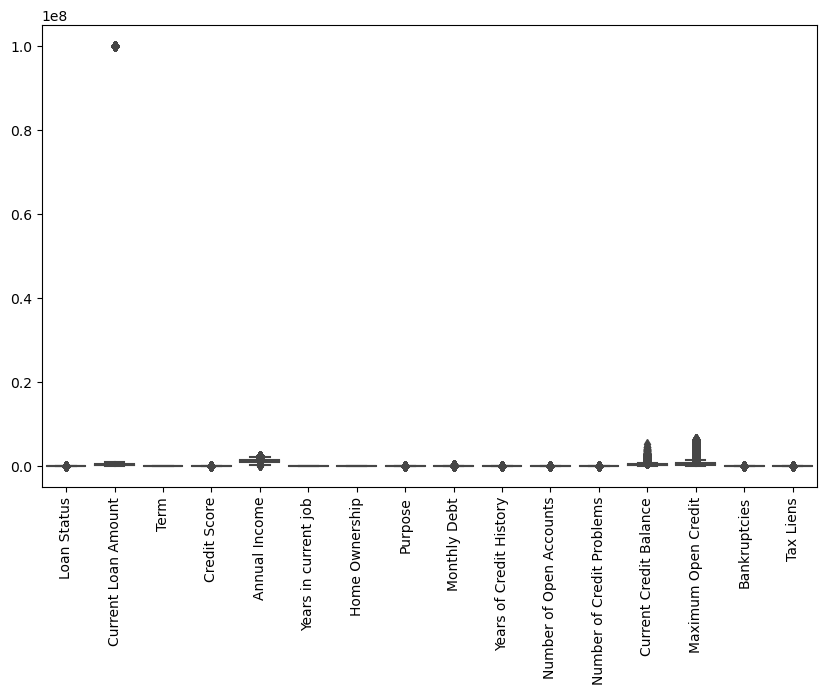

In [27]:
data_array = loan_df_train.to_numpy()

# Get column names
column_names = loan_df_train.columns

# Plot boxplot using the NumPy array and column names
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_array)
plt.xticks(ticks=range(len(column_names)), labels=column_names, rotation=90)
plt.show()

In [28]:
#rearranging the columns
loan_df_train = loan_df_train[['Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History','Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Loan Status']]
loan_df_train.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
0,445412.0,1,709.0,1167493.0,8,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,1
1,262328.0,1,724.0,1174162.0,1,1,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,1
2,99999999.0,1,741.0,2231892.0,8,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,1
3,347666.0,0,721.0,806949.0,3,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1
4,176220.0,1,724.0,1174162.0,5,3,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,1


In [29]:
# Separate features and target variable
X = loan_df_train.drop(columns=['Loan Status'])
y = loan_df_train['Loan Status']

In [63]:
#Value_counts of y
y.value_counts()

Loan Status
1    71272
0    21542
Name: count, dtype: int64

In [48]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
#Robust scalling
rob_scaler = RobustScaler()
X_train = rob_scaler.fit_transform(X_train)
X_test = rob_scaler.fit_transform(X_test)

In [59]:
# Feedforward Neural Network (FFNN)
ffnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
ffnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ffnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate FFNN
ffnn_accuracy = ffnn_model.evaluate(X_test, y_test)[1]
print("Feedforward Neural Network (FFNN) Accuracy:", ffnn_accuracy)

# Predictions
ffnn_predictions = (ffnn_model.predict(X_test) > 0.5).astype("int32")

# Classification report
print("Classification Report (FFNN):\n", classification_report(y_test, ffnn_predictions))

# Confusion matrix
ffnn_conf_matrix = confusion_matrix(y_test, ffnn_predictions)
print("Confusion Matrix (FFNN):\n", ffnn_conf_matrix)

Epoch 1/5
1857/1857 [==============================] - 12s 6ms/step - loss: 0.4420 - accuracy: 0.8120 - val_loss: 0.4370 - val_accuracy: 0.8109
Epoch 2/5
1857/1857 [==============================] - 10s 6ms/step - loss: 0.4336 - accuracy: 0.8127 - val_loss: 0.4351 - val_accuracy: 0.8115
Epoch 3/5
1857/1857 [==============================] - 11s 6ms/step - loss: 0.4319 - accuracy: 0.8128 - val_loss: 0.4349 - val_accuracy: 0.8112
Epoch 4/5
1857/1857 [==============================] - 11s 6ms/step - loss: 0.4305 - accuracy: 0.8126 - val_loss: 0.4333 - val_accuracy: 0.8108
Epoch 5/5
581/581 [==============================] - 3s 4ms/step - loss: 0.4245 - accuracy: 0.8186
Feedforward Neural Network (FFNN) Accuracy: 0.8185638189315796
581/581 [==============================] - 3s 5ms/step
Classification Report (FFNN):
               precision    recall  f1-score   support

           0       0.97      0.21      0.34      4221
           1       0.81      1.00      0.89     14342

    accuracy

In [51]:
# Convolutional Neural Network (CNN)
cnn_model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate CNN
cnn_accuracy = cnn_model.evaluate(X_test.reshape(-1, X_test.shape[1], 1), y_test)[1]
print("Convolutional Neural Network (CNN) Accuracy:", cnn_accuracy)

# Predictions
cnn_predictions = (cnn_model.predict(X_test.reshape(-1, X_test.shape[1], 1)) > 0.5).astype("int32")

# Classification report
print("Classification Report (CNN):\n", classification_report(y_test, cnn_predictions))

# Confusion matrix
cnn_conf_matrix = confusion_matrix(y_test, cnn_predictions)
print("Confusion Matrix (CNN):\n", cnn_conf_matrix)

Epoch 1/5
1857/1857 [==============================] - 17s 8ms/step - loss: 0.4396 - accuracy: 0.8121 - val_loss: 0.4355 - val_accuracy: 0.8113
Epoch 2/5
1857/1857 [==============================] - 15s 8ms/step - loss: 0.4332 - accuracy: 0.8126 - val_loss: 0.4320 - val_accuracy: 0.8112
Epoch 3/5
1857/1857 [==============================] - 15s 8ms/step - loss: 0.4317 - accuracy: 0.8125 - val_loss: 0.4308 - val_accuracy: 0.8112
Epoch 4/5
1857/1857 [==============================] - 15s 8ms/step - loss: 0.4303 - accuracy: 0.8125 - val_loss: 0.4305 - val_accuracy: 0.8107
Epoch 5/5
581/581 [==============================] - 3s 5ms/step - loss: 0.4220 - accuracy: 0.8192
Convolutional Neural Network (CNN) Accuracy: 0.8192102313041687
581/581 [==============================] - 3s 5ms/step
Classification Report (CNN):
               precision    recall  f1-score   support

           0       0.99      0.21      0.34      4221
           1       0.81      1.00      0.90     14342

    accuracy

In [52]:
# Recurrent Neural Network (RNN)
rnn_model = Sequential([
    tf.keras.layers.SimpleRNN(64, input_shape=(X_train.shape[1], 1)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate RNN
rnn_accuracy = rnn_model.evaluate(X_test.reshape(-1, X_test.shape[1], 1), y_test)[1]
print("Recurrent Neural Network (RNN) Accuracy:", rnn_accuracy)

# Predictions
rnn_predictions = (rnn_model.predict(X_test.reshape(-1, X_test.shape[1], 1)) > 0.5).astype("int32")

# Classification report
print("Classification Report (RNN):\n", classification_report(y_test, rnn_predictions))

# Confusion matrix
rnn_conf_matrix = confusion_matrix(y_test, rnn_predictions)
print("Confusion Matrix (RNN):\n", rnn_conf_matrix)


Epoch 1/5
1857/1857 [==============================] - 28s 14ms/step - loss: 0.4455 - accuracy: 0.8114 - val_loss: 0.4400 - val_accuracy: 0.8113
Epoch 2/5
1857/1857 [==============================] - 25s 14ms/step - loss: 0.4382 - accuracy: 0.8124 - val_loss: 0.4453 - val_accuracy: 0.8113
Epoch 3/5
1857/1857 [==============================] - 25s 13ms/step - loss: 0.4367 - accuracy: 0.8126 - val_loss: 0.4399 - val_accuracy: 0.8113
Epoch 4/5
1857/1857 [==============================] - 25s 13ms/step - loss: 0.4354 - accuracy: 0.8124 - val_loss: 0.4349 - val_accuracy: 0.8113
Epoch 5/5
581/581 [==============================] - 4s 7ms/step - loss: 0.4265 - accuracy: 0.8191
Recurrent Neural Network (RNN) Accuracy: 0.8191025257110596
581/581 [==============================] - 4s 6ms/step
Classification Report (RNN):
               precision    recall  f1-score   support

           0       1.00      0.20      0.34      4221
           1       0.81      1.00      0.90     14342

    accuracy

In [53]:
# Long Short-Term Memory (LSTM)
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate LSTM
lstm_accuracy = lstm_model.evaluate(X_test.reshape(-1, X_test.shape[1], 1), y_test)[1]
print("Long Short-Term Memory (LSTM) Accuracy:", lstm_accuracy)

# Predictions
lstm_predictions = (lstm_model.predict(X_test.reshape(-1, X_test.shape[1], 1)) > 0.5).astype("int32")

# Classification report
print("Classification Report (LSTM):\n", classification_report(y_test, lstm_predictions))

# Confusion matrix
lstm_conf_matrix = confusion_matrix(y_test, lstm_predictions)
print("Confusion Matrix (LSTM):\n", lstm_conf_matrix)


Epoch 1/5
1857/1857 [==============================] - 57s 28ms/step - loss: 0.4594 - accuracy: 0.8064 - val_loss: 0.4466 - val_accuracy: 0.8113
Epoch 2/5
1857/1857 [==============================] - 49s 26ms/step - loss: 0.4463 - accuracy: 0.8121 - val_loss: 0.4456 - val_accuracy: 0.8113
Epoch 3/5
1857/1857 [==============================] - 50s 27ms/step - loss: 0.4445 - accuracy: 0.8125 - val_loss: 0.4483 - val_accuracy: 0.8113
Epoch 4/5
1857/1857 [==============================] - 49s 27ms/step - loss: 0.4442 - accuracy: 0.8125 - val_loss: 0.4483 - val_accuracy: 0.8113
Epoch 5/5
581/581 [==============================] - 8s 14ms/step - loss: 0.4358 - accuracy: 0.8191
Long Short-Term Memory (LSTM) Accuracy: 0.8191025257110596
581/581 [==============================] - 8s 11ms/step
Classification Report (LSTM):
               precision    recall  f1-score   support

           0       1.00      0.20      0.34      4221
           1       0.81      1.00      0.90     14342

    accura

In [56]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8189947745515272

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.25      0.38      4221
           1       0.82      0.99      0.89     14342

    accuracy                           0.82     18563
   macro avg       0.84      0.62      0.64     18563
weighted avg       0.83      0.82      0.78     18563


Confusion Matrix:
[[ 1039  3182]
 [  178 14164]]


In [77]:
# Accuracy scores for each model
model_names = ['CNN', 'LSTM', 'RNN', 'FFNN','Random Forest']
accuracy_scores = [cnn_accuracy, lstm_accuracy, rnn_accuracy, ffnn_accuracy,accuracy]

# Create a DataFrame
accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores})

# Print the DataFrame
print(accuracy_df)

           Model  Accuracy
0            CNN  0.819210
1           LSTM  0.819103
2            RNN  0.819103
3           FFNN  0.818564
4  Random Forest  0.818995


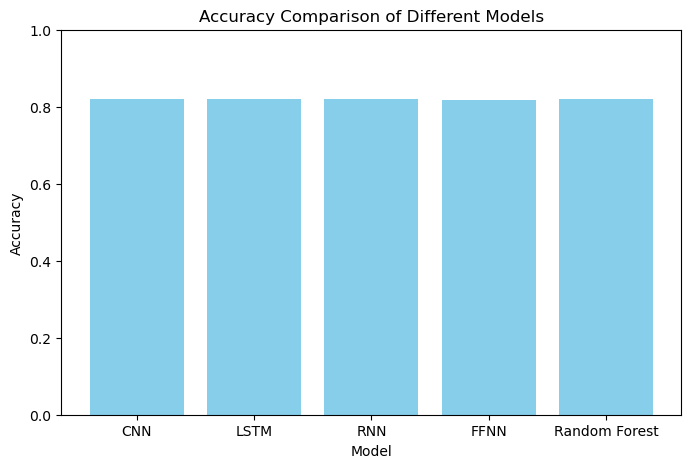

In [78]:
# Plot the accuracy comparison table
plt.figure(figsize=(8, 5))
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'], color='skyblue')
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to range from 0 to 1
plt.show()